In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("data/healthcare-dataset-stroke-data.csv")

In [6]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [10]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [13]:
df["bmi"].fillna(df["bmi"].mean())

0       36.600000
1       28.893237
2       32.500000
3       34.400000
4       24.000000
          ...    
5105    28.893237
5106    40.000000
5107    30.600000
5108    25.600000
5109    26.200000
Name: bmi, Length: 5110, dtype: float64

In [9]:
df.shape
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [11]:
df["stroke"].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt 

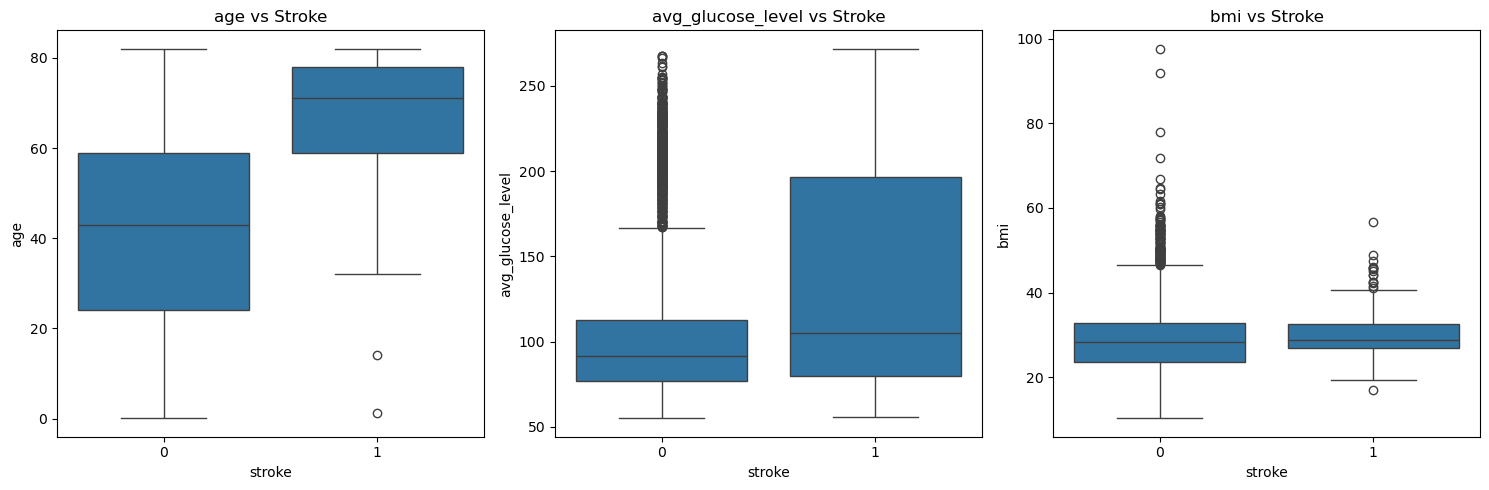

In [19]:
numerical_cols = ['age','avg_glucose_level','bmi']

plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x='stroke', y=col, data=df)
    plt.title(f"{col} vs Stroke")
plt.tight_layout()
plt.show()

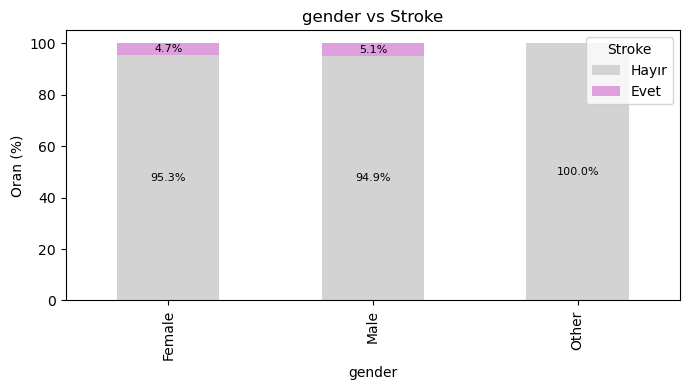

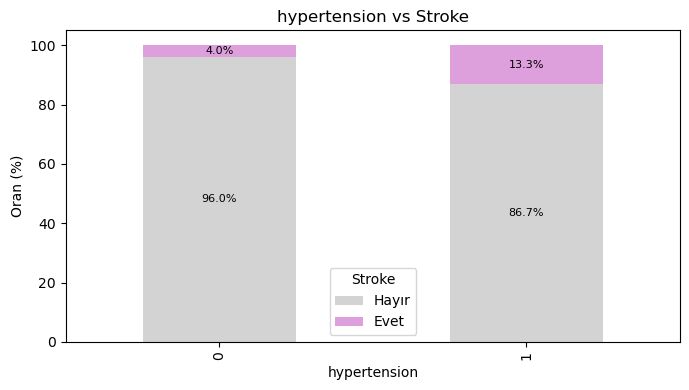

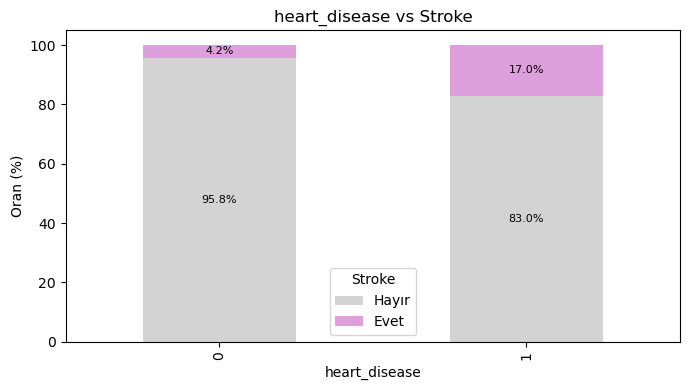

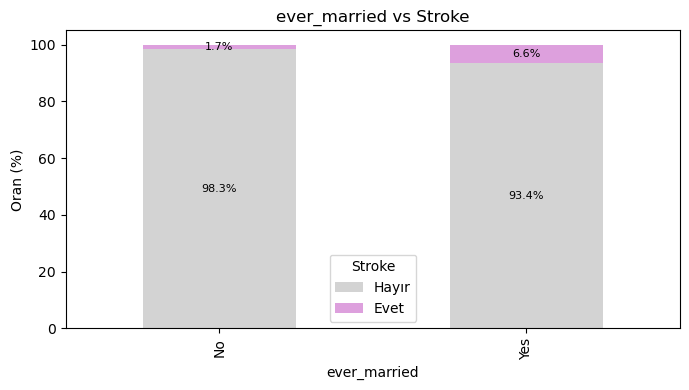

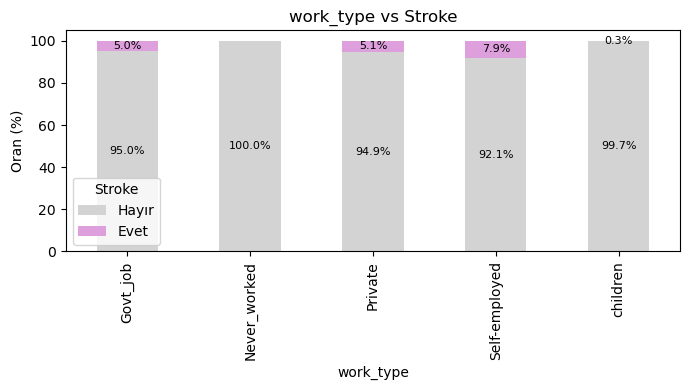

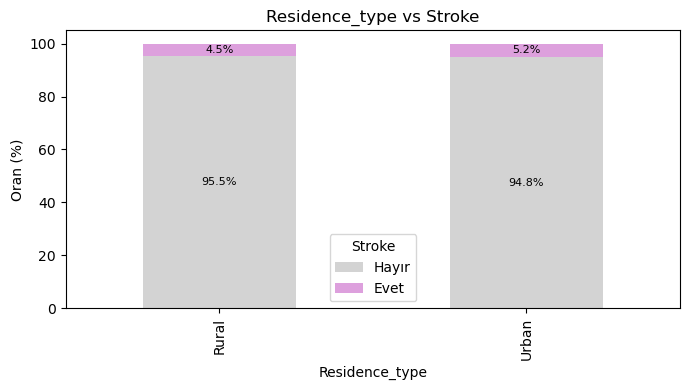

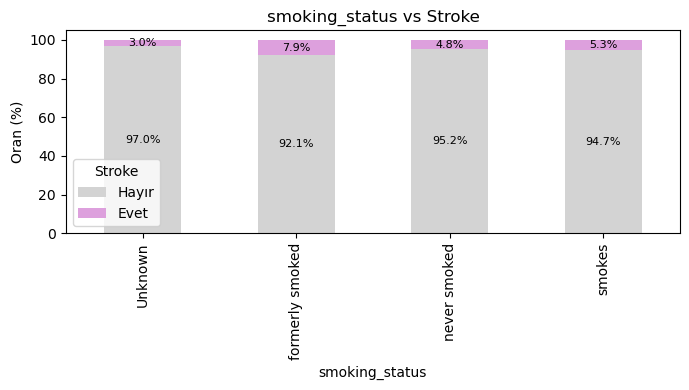

In [25]:
categorical_cols = ['gender', 'hypertension', 'heart_disease', 'ever_married', 
                    'work_type', 'Residence_type', 'smoking_status']
colors = [ '#D3D3D3','#DDA0DD']

for col in categorical_cols:
    # Oranlı çapraz tablo
    ctab = pd.crosstab(df[col], df["stroke"], normalize='index') * 100  # Yüzdelik hale getiriyoruz

    # Grafik oluştur
    ax = ctab.plot(kind='bar', stacked=True, figsize=(7, 4), color=colors)
    plt.title(f"{col} vs Stroke")
    plt.ylabel("Oran (%)")
    plt.xlabel(col)
    plt.legend(title="Stroke", labels=["Hayır", "Evet"])

    # Çubukların üzerine değer yaz
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{height:.1f}%', 
                        (p.get_x() + p.get_width() / 2, p.get_y() + height / 2),
                        ha='center', va='center', fontsize=8, color='black')

    plt.tight_layout()
    plt.show()